# CIFAR Classifier Module Demo
*Welcome to the demo of our lib CIFAR Classifier !*

A quick summary of what will be showed in this notebook :


#### Chargement des données

In [1]:
from CIFAR_Classif.data_preprocess import load_data

path_list = ['../data/cifar-10-batches-py/data_batch_5', '../data/cifar-10-batches-py/data_batch_4', '../data/cifar-10-batches-py/data_batch_3',
             '../data/cifar-10-batches-py/data_batch_2', '../data/cifar-10-batches-py/data_batch_1']

X, y = load_data(path_list)

ModuleNotFoundError: No module named 'CIFAR_Classif'

Illustration du préprocessing de l'image :

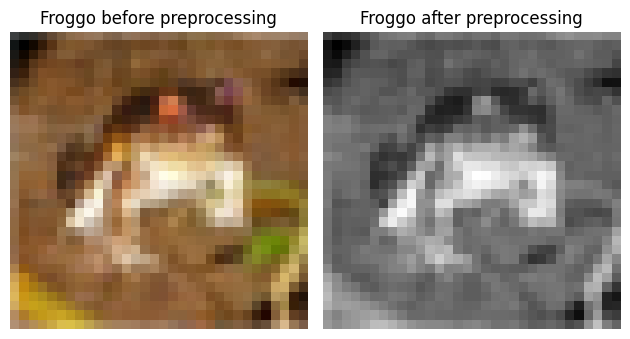

In [10]:
import matplotlib.pyplot as plt

image_test = data[0].reshape(3, 32, 32).transpose(1, 2, 0)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(image_test)
axes[0].set_title('Froggo before preprocessing')
axes[1].imshow(np.dot(image_test[...,:3], [0.2989, 0.5870, 0.1140]), cmap=plt.get_cmap('gray'))
axes[1].set_title('Froggo after preprocessing')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

Une fois nos attributs obtenus, on prépare les ensemble de train et test afin d'utiliser des classifiers

In [ ]:
from sklearn.model_selection import train_test_split
# X: Features, y: Labels
X_train, X_test, y_train, y_test = train_test_split(hog_features, data_dict[b'labels'], test_size=0.2, random_state=42)

Pour le classifier KNN on effectue un GridSearch afin de connaître les hyperparamètres optimaux

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the data to perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Best Score: 0.42299999999999993


On compare les résultats de trois classifiers différents :

- SVC qui est non paramétrique et non linéaire.
- Regression Logistique qui est paramétrique et Linéaire
- KNN qui est non paramétrique et linéaire

In [32]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVC accuracy:", accuracy)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression accuracy:", accuracy)

knn = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='auto')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN accuracy:", accuracy)

SVC accuracy: 0.57
Logistic Regression accuracy: 0.5125
KNN accuracy: 0.433


On observe une meilleure précision avec le SVC